In [1]:
#データ読み込み
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import norm
import seaborn as sns
from scipy.stats import t
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from tqdm import tqdm
# from pathlib import Path
# BASE_DIR = Path(__file__).resolve().parent.parent.parent

sim_num = 100
years = 5

In [2]:
#関数を定義
def make_return(loc1, loc2, scale1, scale2):
#     loc1 = 1.0005478168389164
#     loc2 = 0.9971137713072488
#     scale1 = 0.01024285501985374
#     scale2 = 0.029152921438795287
    
    #5%の確率で異常状態の正規分布からサンプリング
    if np.random.rand()<0.05:
        a=np.random.normal(loc2,scale2)
        svm_result=-1
    #95%の確率で正常状態の正規分布からサンプリング
    else:
        a=np.random.normal(loc1,scale1)
        svm_result=1
    return a,svm_result

,日付,終値,前日比率,ボラティリティ
1,2011-07-25,853,0.990708,0.009357
2,2011-07-26,858,1.005862,0.010490
3,2011-07-27,852,0.993007,0.012931
4,2011-07-28,840,0.985915,0.016653
5,2011-07-29,834,0.992857,0.007177
...,...,...,...,...
2442,2021-07-15,1978,0.987026,0.014108
2443,2021-07-16,1973,0.997472,0.008615
2444,2021-07-19,1945,0.985808,0.017466
2445,2021-07-20,1926,0.990231,0.011932


<ipython-input-15-5f166203dbc0>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['svm']=pred
100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 210.80it/s]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.005208,0.989559,1.001729,0.991381,1.000938,0.998526,0.987243,0.991802,0.987843,1.017528,...,1.000814,0.982838,1.024339,1.005432,0.993906,0.986599,0.940889,0.994197,1.017238,0.980468
1,1.011033,0.994733,0.999696,0.992263,1.001506,0.995467,0.982705,0.977640,0.984950,1.008656,...,0.994237,0.968591,1.023269,1.006079,0.981879,0.980272,0.947567,0.997547,1.022818,0.993100
2,1.005090,1.003668,1.012199,0.978404,0.987502,0.982952,0.978663,0.967762,0.986053,1.007113,...,1.005472,0.957726,1.033222,1.002700,0.962968,0.989008,0.947797,0.982195,1.019691,1.004461
3,0.987421,0.992211,1.012739,0.973989,0.996352,0.993993,0.984570,0.959301,0.985621,1.013439,...,1.009761,0.963343,1.020372,1.005203,0.967729,0.996516,0.943659,0.967031,1.011467,1.022117
4,0.980792,0.997835,1.016109,0.969748,1.004035,1.005417,0.995889,0.970757,0.992212,1.017619,...,1.007924,0.964844,1.015037,1.002943,0.975967,1.001622,0.943290,0.956765,1.016610,1.030152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1.753760,0.761536,2.992601,2.389862,0.504614,1.206019,1.579684,0.690249,1.512506,1.760531,...,1.698539,1.833299,0.805465,0.885211,3.069266,1.690656,2.293600,0.955522,3.357691,0.977448
1196,1.748357,0.746267,2.940761,2.406348,0.510546,1.208831,1.612052,0.684700,1.543457,1.753571,...,1.722086,1.840274,0.799931,0.885052,3.062326,1.674986,2.301578,0.956212,3.392571,0.971590
1197,1.733583,0.735477,2.933808,2.406609,0.514459,1.200828,1.619097,0.678759,1.562176,1.770360,...,1.753406,1.844005,0.789628,0.883546,3.095801,1.694247,2.293470,0.946125,3.384655,0.986395
1198,1.714855,0.731700,2.957331,2.365370,0.517956,1.187922,1.623178,0.684844,1.547612,1.805735,...,1.820655,1.843894,0.794332,0.877209,3.101244,1.695684,2.278984,0.947418,3.411864,0.971413


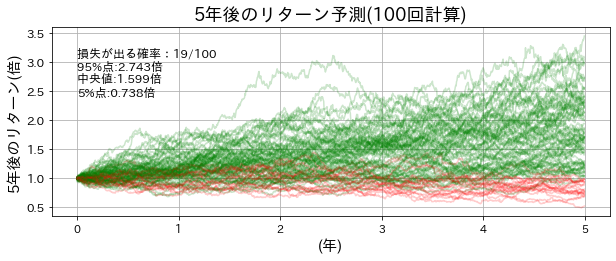

In [15]:
# ファイル読み込み
file='C:/Users/nakam/Dropbox/資産/Django/data/FTOPIX.xlsx'
df=pd.read_excel(file)

#出来高は不要なので削除
del df['出来高']

#前日の変数を追加
for i in ['始値', '高値', '安値', '終値']:
    df[i+"(前日)"]=df[i].shift(1)
df['前日比率']=df['終値']/df['終値(前日)']

# ボラティリティの計算
df['当日の高値-当日の安値']=df['高値']-df['安値']
df['当日の高値-前日の終値']=df['高値']-df['終値(前日)']
df['前日の終値-当日の安値']=df['終値(前日)']-df['安値']
df['True Range']=df[['当日の高値-当日の安値','当日の高値-前日の終値','前日の終値-当日の安値']].max(axis=1)
df['Typical Price']=(df['高値']+df['安値']+df['終値'])/3
df['ボラティリティ']=df['True Range']/df['Typical Price']

df=df.dropna()
df=df[['日付', '終値', '前日比率', 'ボラティリティ']]
display(df)

#正規化を実施
X_train=df[['前日比率','ボラティリティ']]

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_train_std

#one class svmでデータを正常・異常に分ける
clf = OneClassSVM(nu=0.05, kernel='rbf', gamma=0.5)
clf.fit(X_train_std)
pred = clf.predict(X_train_std)

X_train['svm']=pred

#正規分布を推定
df_temp = X_train[X_train['svm']==1]
loc, scale = norm.fit(df_temp['前日比率'].dropna())
df_temp_1=X_train[X_train['svm']==-1]
loc1, scale1 = norm.fit(df_temp_1['前日比率'].dropna())

#結果の箱を作成
df_sim1=pd.DataFrame()

#1000回シミュレーションを実行
for j in tqdm(range(sim_num)):
    return_list=[]

    #1年間を240日と考えて、20年後までをシミュレーションする
    for i in range(240*years):
        a,svm_result=make_return(loc, loc1, scale, scale1)
        return_list.append(a)
    return_list=np.array(return_list)
    df_sim1[j]=return_list

#累積リターンを計算
df_sim2=df_sim1.cumprod()
display(df_sim2)

#結果を可視化
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['figure.subplot.top'] = 0.90
plt.figure(figsize=(10,3.5))

num=0
for i in df_sim2.columns:
    temp=df_sim2[i].iloc[:240*years]
    if temp.iloc[-1]<1:
        plt.plot(temp.index/240,temp,alpha=0.2,c='r')
        num=num+1
    else:
        plt.plot(temp.index/240,temp,alpha=0.2,c='g')

plt.text(0, df_sim2.max().max()*0.7, "損失が出る確率：{}/{} \n95%点:{:.3f}倍 \n中央値:{:.3f}倍 \n5%点:{:.3f}倍".format(num,
    sim_num,df_sim2.iloc[240*years-1].quantile(0.95),df_sim2.iloc[240*years-1].median(),df_sim2.iloc[240*years-1].quantile(0.05)),fontsize=12)
plt.title('{}年後のリターン予測({}回計算)'.format(years,sim_num),fontsize=18)
plt.xlabel('(年)',fontsize=15)
plt.ylabel('{}年後のリターン(倍)'.format(years),fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
plt.grid()

# plt.savefig(str(BASE_DIR)+'/static/images/random_predict.png')
plt.show()